(-0.5, 1036.5, 777.5, -0.5)

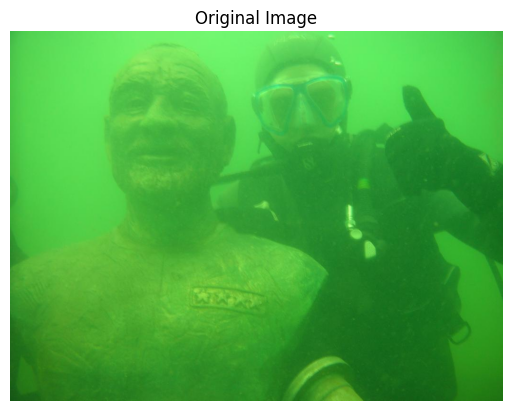

In [ ]:
'''
Enhancement of underwater images with techniques learnt as part of MTCS - 104
Author: Mantha Sai Gopal
Reg.no: 23358
'''

import cv2
import numpy as np
import matplotlib.pyplot as plt

# reading the image
image = cv2.imread('/content/test13.jpg')

# Convert the image from BGR to RGB
im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(im_rgb)
plt.title('Original Image')
plt.axis('off')

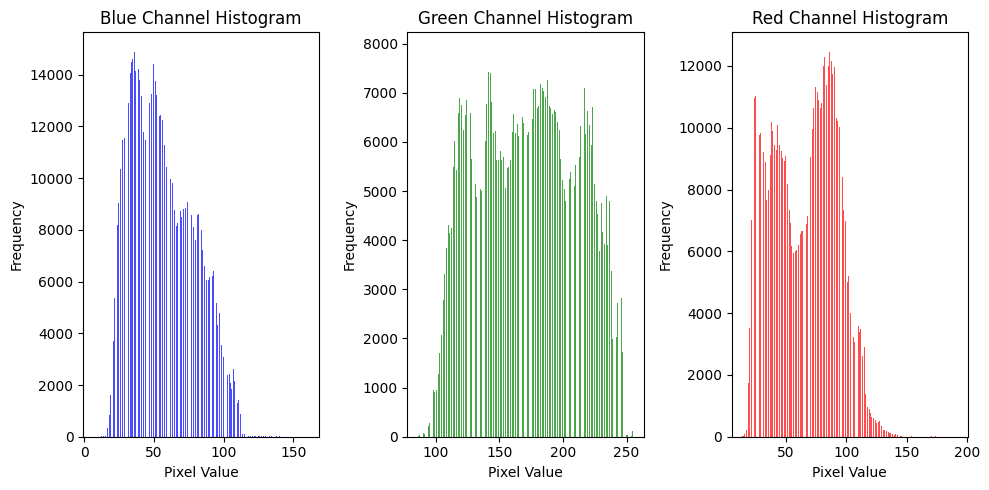

In [ ]:
'''
For the above image we will plot the histograms of the individual colour channels and intuitively we must
expect that the plot corresponding to G(green channel) will have values equally ranging from [0,255] while for R and B the
plot could be skewed to the left.
'''

# Split the image into its RGB channels
b, g, r = cv2.split(image)

# Plot histograms for each channel
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.hist(b.ravel(), bins=256, color='blue', alpha=0.7, rwidth=0.85)
plt.title('Blue Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(g.ravel(), bins=256, color='green', alpha=0.7, rwidth=0.85)
plt.title('Green Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(r.ravel(), bins=256, color='red', alpha=0.7, rwidth=0.85)
plt.title('Red Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

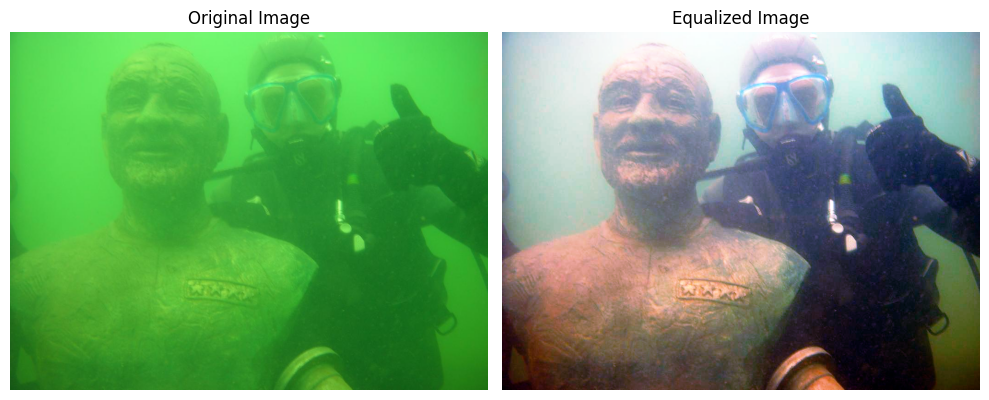

In [ ]:
'''
The result is indeed as expected. In order balance this skewedness it is natural to perform
histogram equalization on all the 3 channels and anticipate a better image.
'''

# Equalize the histograms for the red and blue channels
equ_b = cv2.equalizeHist(b)
equ_r = cv2.equalizeHist(r)
equ_g = cv2.equalizeHist(g)

# Merge the equalized channels
equalized_image = cv2.merge([equ_b, equ_g, equ_r])

# Display the equalized image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Equalized Image')

plt.tight_layout()
plt.show()

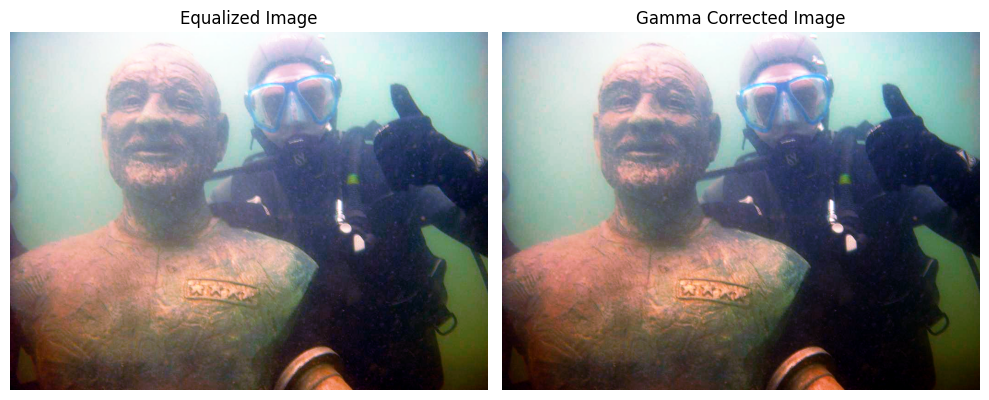

In [ ]:
'''
The image obtained is clearly better than what we started with. However, there is still scope for enhancement. For instance the image looks "over exposed" at the top,
and also the green appearance to the right bottom is not fully gone. The image further looks hazy and we can sharpen the image.
'''

# Set the gamma value
gamma = 1.25

# Perform gamma correction
gamma_corrected = np.power(equalized_image / 255.0, gamma) * 255.0
gamma_corrected = np.uint8(gamma_corrected)

# Display the equalized image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
plt.title('Gamma Corrected Image')
plt.axis('off')

plt.tight_layout()
plt.show()


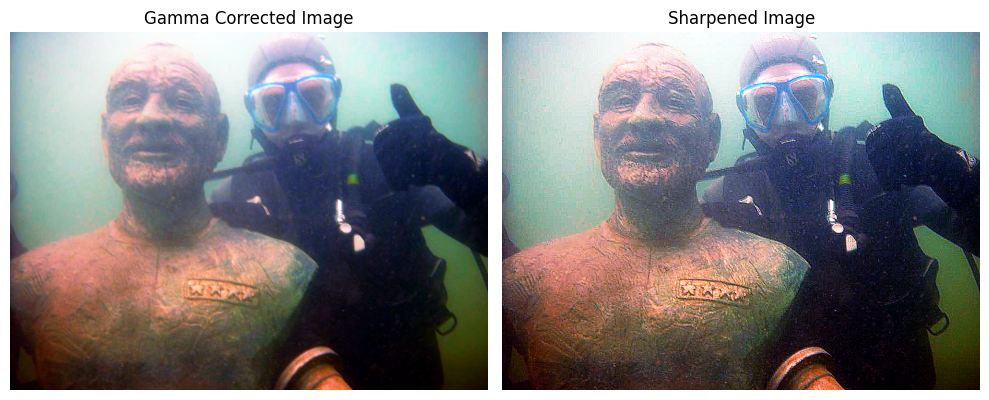

In [ ]:
'''
After gamma correction we see that the lower part in the image is well contrasted. For example, the stars and face appear more distinctive now.
However, the image still needs sharpening to enhance the edges.
'''

# Define a sharpening kernel
kernel = np.array([[-1, -1, -1],
                   [-1,  9, -1],
                   [-1, -1, -1]])

# Apply the kernel to the image
sharpened_image = cv2.filter2D(gamma_corrected, -1, kernel)

# Display the original and sharpened images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
plt.title('Gamma Corrected Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image')
plt.axis('off')

plt.tight_layout()
plt.show()